In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
root_path = '..'
# save_csv_path = f'/networks/dataset-network-out/NET_3/test/'
# file_1 = '_nodes_dataset.csv' 
# wdn = pd.read_csv(root_path + save_csv_path + file_1, sep=',')

save_csv_path = f'/networks/dataset-network-out/NET_2/h_24/'
file_1 = 'NET_2_bd_pattern_h_24_leak_area_0_nodes.csv' 
wdn = pd.read_csv(root_path + save_csv_path + file_1, sep=';')

In [43]:
#inspect data structure
#head and columns
print(wdn.columns)
print(wdn.head())
print(len(wdn))

Index(['hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak',
       'leak_area_value', 'leak_discharge_value', 'leak_demand_value'],
      dtype='object')
      hour  nodeID  base_demand  demand_value  head_value  pressure_value  \
0  0:00:00  880000     0.000000      0.000000  189.466705       40.559530   
1  0:00:00  880001     0.000040      0.000040  194.236771       48.102179   
2  0:00:00  880002     0.000039      0.000039  194.992130       51.956135   
3  0:00:00  880003     0.000009      0.000009  194.960612       50.759823   
4  0:00:00  880004     0.000067      0.000067  194.985572       49.402210   

        x_pos      y_pos node_type  has_leak  leak_area_value  \
0  4071494.75  3449266.0  Junction     False              0.0   
1  4076447.50  3442551.0  Junction     False              0.0   
2  4072563.25  3440915.0  Junction     False              0.0   
3  4073314.75  3441013.0  Junction     False 

In [6]:
print(wdn.shape)
print(wdn.iloc[-1])

(19560, 13)
hour                     23:00:00
nodeID                     880814
base_demand                   0.0
demand_value            -0.022664
head_value              191.77953
pressure_value          42.280372
x_pos                   4071754.0
y_pos                   3449833.0
node_type                    Tank
has_leak                    False
leak_area_value               0.0
leak_discharge_value          0.0
leak_demand_value             0.0
Name: 19559, dtype: object


In [8]:
nodeListValue = wdn['nodeID'].unique()
print(nodeListValue)
print(len(nodeListValue))

[880000 880001 880002 880003 880004 880005 880006 880007 880008 880009
 880010 880011 880012 880013 880014 880015 880016 880017 880018 880019
 880020 880021 880022 880023 880024 880025 880026 880027 880028 880029
 880030 880031 880032 880033 880034 880035 880036 880037 880038 880039
 880040 880041 880042 880043 880044 880045 880046 880047 880048 880049
 880050 880051 880052 880053 880054 880055 880056 880057 880058 880059
 880060 880061 880062 880063 880064 880065 880066 880067 880068 880069
 880070 880071 880072 880073 880074 880075 880076 880077 880078 880079
 880080 880081 880082 880083 880084 880085 880086 880087 880088 880089
 880090 880091 880092 880093 880094 880095 880096 880097 880098 880099
 880100 880101 880102 880103 880104 880105 880106 880107 880108 880109
 880110 880111 880112 880113 880114 880115 880116 880117 880118 880119
 880120 880121 880122 880123 880124 880125 880126 880127 880128 880129
 880130 880131 880132 880133 880134 880135 880136 880137 880138 880139
 88014

In [11]:
#group by node
meanDemandValue = wdn.groupby(['nodeID'])['demand_value'].mean()
print(meanDemandValue)
wdn.groupby('nodeID').demand_value.agg(['min', 'max', 'mean'])

nodeID
880000    0.000000
880001    0.000120
880002    0.000119
880003    0.000026
880004    0.000202
            ...   
880810    0.000000
880811    0.099705
880812   -0.009008
880813    0.011320
880814   -0.010511
Name: demand_value, Length: 815, dtype: float64


,min,max,mean
nodeID,,,
880000,0.000000,0.000000,0.000000
880001,0.000025,0.000211,0.000120
880002,0.000025,0.000209,0.000119
880003,0.000005,0.000045,0.000026
880004,0.000042,0.000354,0.000202
...,...,...,...
880810,0.000000,0.000000,0.000000
880811,-0.000000,0.177806,0.099705
880812,-0.098070,0.033202,-0.009008


In [14]:
unique_node_type = wdn['node_type'].unique()
print(unique_node_type)

['junction' 'reservoir']


In [25]:
nodes_reservoir = wdn.loc[wdn['node_type']=='Reservoir'].groupby('nodeID')[['x_pos', 'y_pos']].min()
# print(nodes_reservoir)

#nodes_junction = wdn.loc[wdn['node_type']=='junction'].groupby('nodeID')[['x_pos', 'y_pos']].min()
nodes_junction = wdn.loc[wdn['node_type']=='Junction'].groupby('nodeID')[['x_pos', 'y_pos']].min()
#print(nodes_junction)

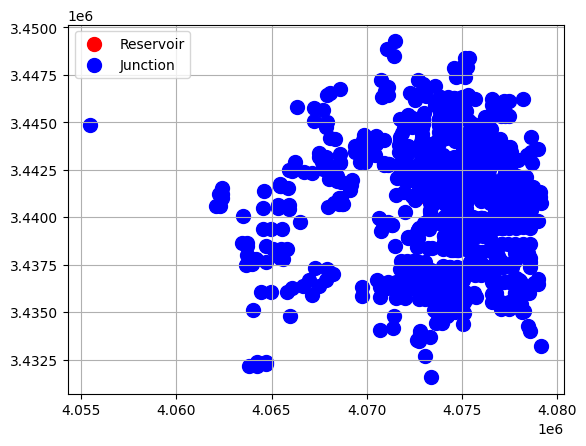

In [29]:

# 
cdict = {1: 'red', 2: 'blue', 3: 'green'}

nodes_pos_x = np.array(nodes_reservoir['x_pos'])
nodes_pos_y = np.array(nodes_reservoir['y_pos'])

plt.scatter(nodes_pos_x, nodes_pos_y, c = cdict[1], label = "Reservoir", s = 100)

nodes_pos_x = np.array(nodes_junction['x_pos'])
nodes_pos_y = np.array(nodes_junction['y_pos'])
plt.scatter(nodes_pos_x, nodes_pos_y, c = cdict[2], label = "Junction", s = 100)

plt.grid()
plt.legend()

# 
# for index, row in nodes_junction.iterrows():
#   # print(row)
#   plt.text(row['x_pos'], row['y_pos'], index, horizontalalignment='left', size='small', color='black')

# group = np.array([1,2,3])
# cdict = {1: 'red', 2: 'blue', 3: 'green'}
# plt.scatter(nodes_pos_x[0:10], nodes_pos_y[0:10], c = cdict[1], label = group[0], s = 100)
# plt.scatter(nodes_pos_x.iloc[10:20], nodes_pos_y.iloc[10:20], c = cdict[2], label = group[1], s = 100)
# plt.scatter(nodes_pos_x.iloc[20:30], nodes_pos_y.iloc[20:30], c = cdict[3], label = group[2], s = 100)

In [34]:
print(wdn.loc[:814, 'pressure_value'] )
print(len(wdn.loc[:814, 'pressure_value']) )

0      40.559530
1      48.102179
2      51.956135
3      50.759823
4      49.402210
         ...    
810    -1.057565
811     0.000000
812    35.407183
813    45.115521
814    39.476843
Name: pressure_value, Length: 815, dtype: float64
815


0 : 814
3256 : 4070
6512 : 7326
9768 : 10582
13024 : 13838
16280 : 17094


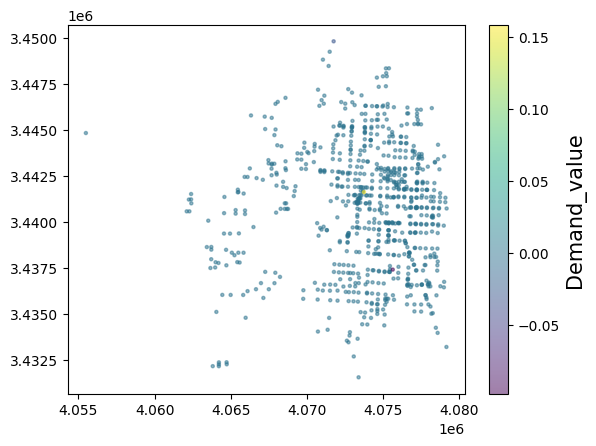

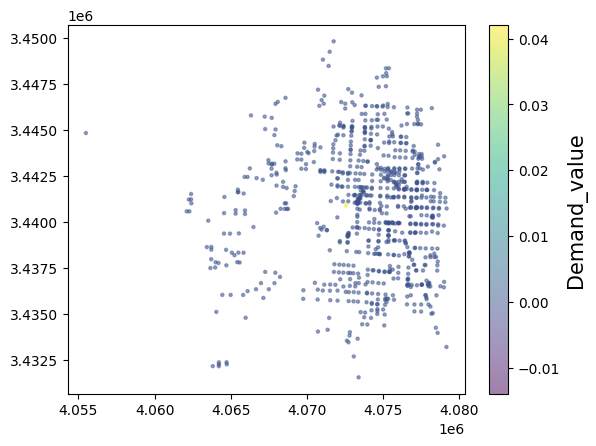

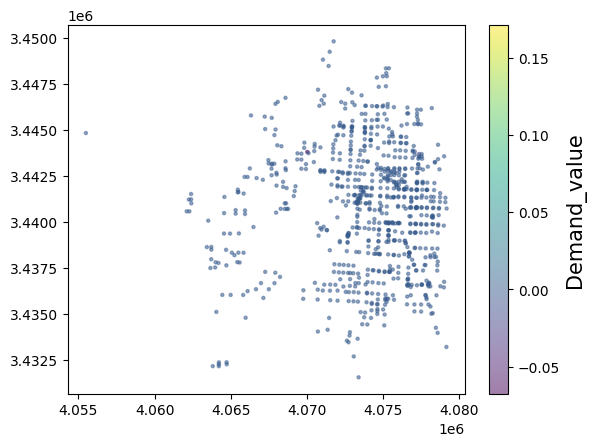

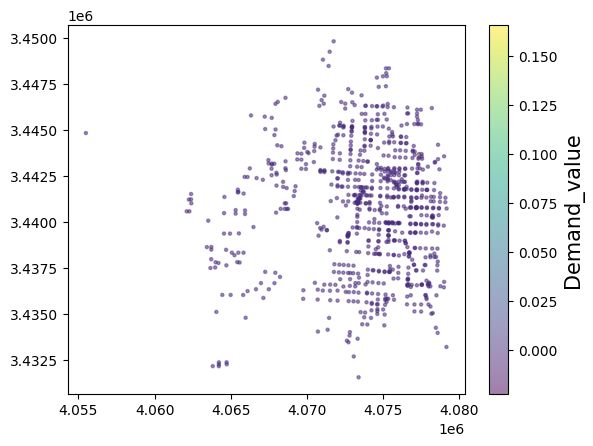

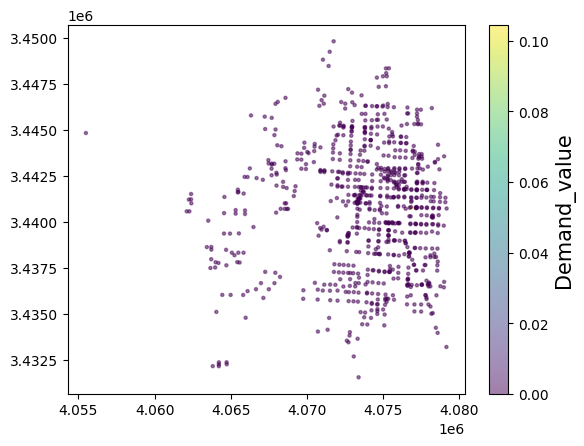

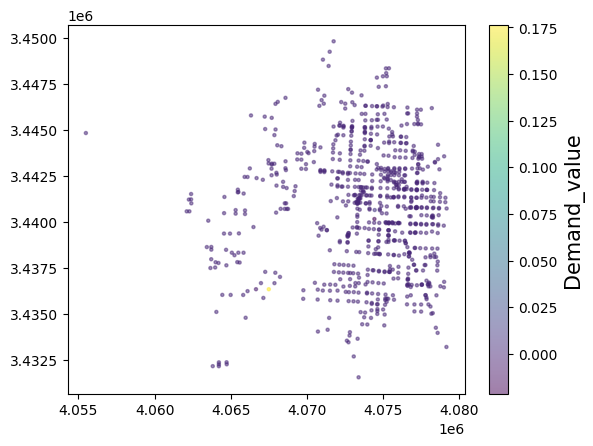

In [46]:
N = wdn.shape[0] #50
x = wdn.loc[:814, 'x_pos'] #np.random.rand(N)
y = wdn.loc[:814, 'y_pos'] #np.random.rand(N)



area = 5 # (30 * np.random.rand(N))**2  # 0 to 15 point radii
figureIndex = 0
for index in range(24):

    if index%4==0:
      print(index*814, ":", (index+1)*814)
      colors_pressure = wdn.loc[index*814:(index+1)*814, 'pressure_value'] 
      colors_demand = wdn.loc[index*814:(index+1)*814, 'demand_value']

      fig = plt.figure(index)
        
      # plt.scatter(x, y, s=area, c=colors_pressure, alpha=0.5)
      # cbar = plt.colorbar()
      # cbar.ax.set_ylabel('Pressure', rotation=90, size=15)
              
      plt.scatter(x, y, s=area, c=colors_demand, alpha=0.5)
      cbar = plt.colorbar()
      cbar.ax.set_ylabel('Demand_value', rotation=90, size=15)
     

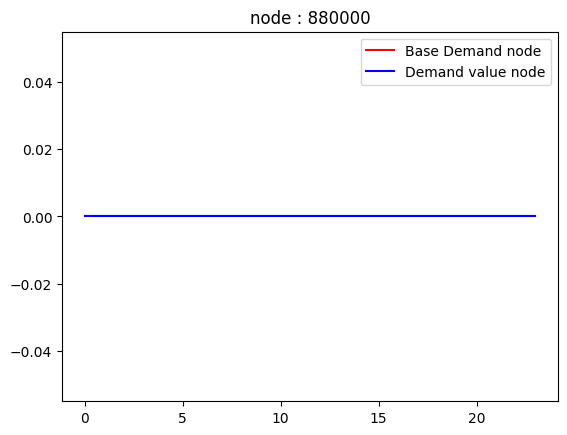

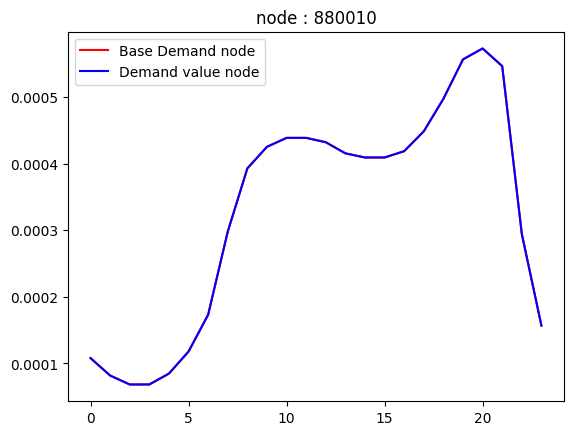

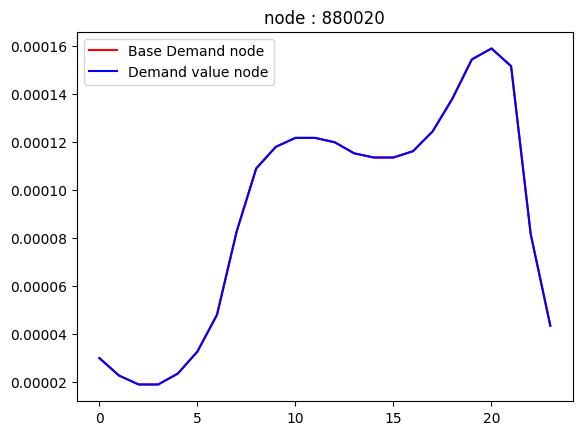

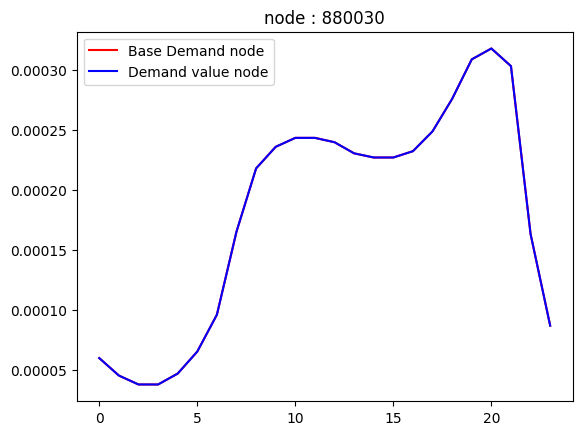

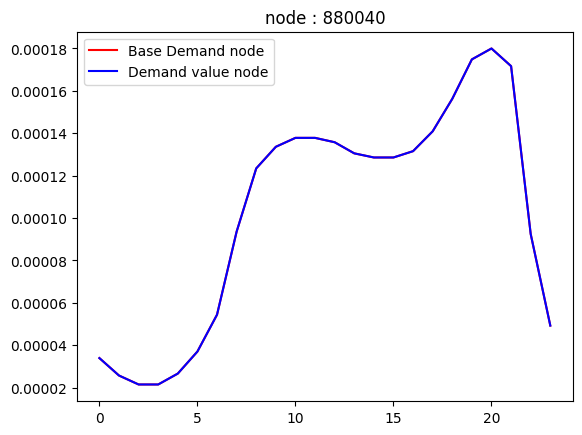

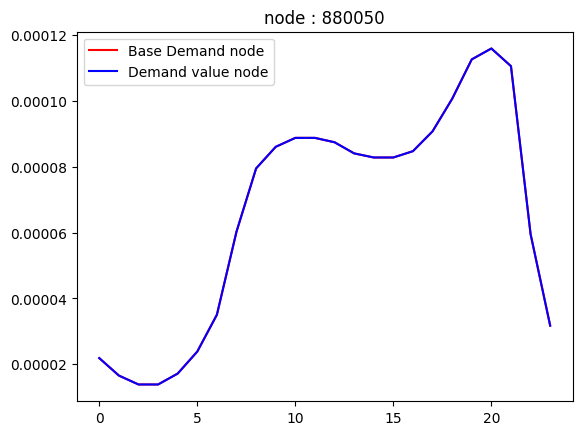

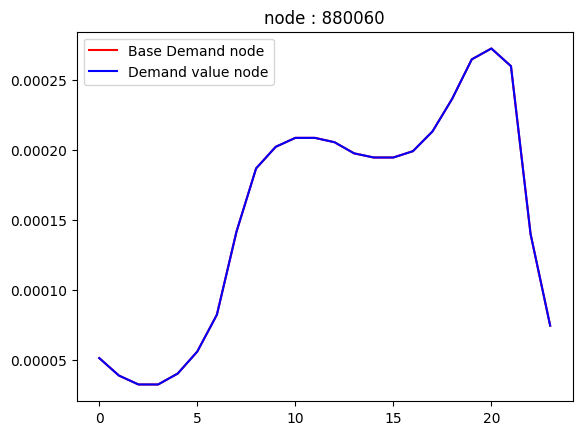

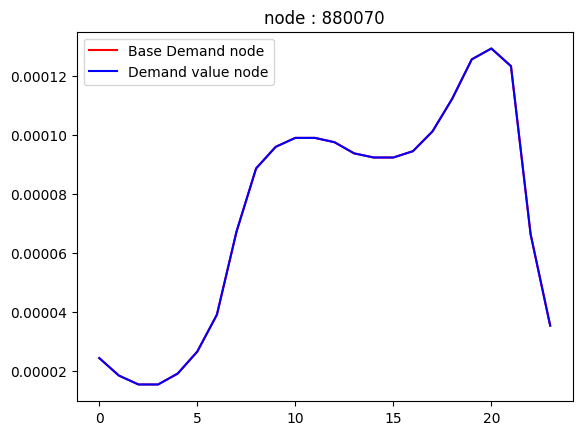

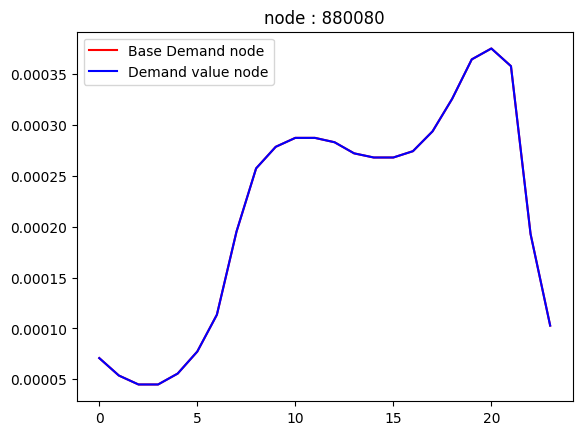

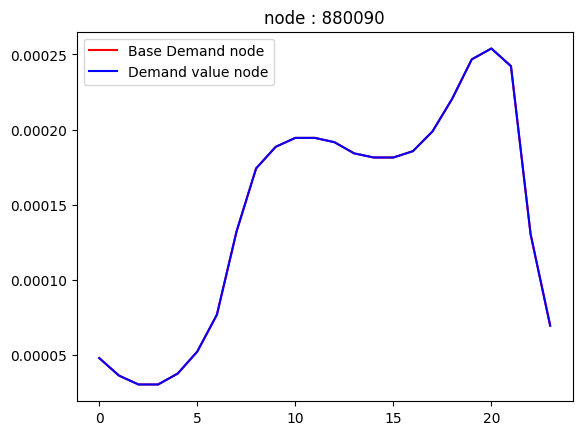

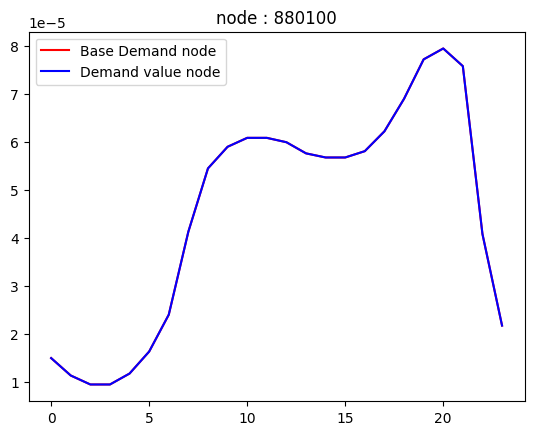

In [28]:
#select node and plot demand (base and value) 

figureIndex = 0


for node in nodeListValue:

    if figureIndex%10==0:

      fig = plt.figure(figureIndex)
      # print("node : ", node)
      dataToPlot = wdn.loc[(wdn['nodeID'] == node)]
      
      baseDemandToPlot = dataToPlot['base_demand'].values #*  3.785412 * 60
      # leakDemandToPlot = dataToPlot['leak_demand_value'].values #*  3.785412 * 60
      demandToPlot = dataToPlot['demand_value'].values #*  3.785412 * 60

      xs = np.arange(len(demandToPlot))

      plt.plot(xs, baseDemandToPlot,  'r', label='Base Demand node')
      plt.plot(xs, demandToPlot,  'b', label='Demand value node')
      # plt.plot(xs, leakDemandToPlot, label='Leak Demand value node')
      plt.title("node : "+ str(node))
      plt.legend()
        
    figureIndex += 1
    if figureIndex>100:
      break

plt.show()


In [47]:
nodes_reservoir = wdn.loc[wdn['node_type']=='Reservoir'].groupby('nodeID')[['x_pos', 'y_pos']].min()
# print(nodes_reservoir)

nodes_junction = wdn.loc[wdn['node_type']=='Junction'].groupby('nodeID')[['x_pos', 'y_pos']].min()
print(nodes_junction)

            x_pos       y_pos
nodeID                       
4922    494117.01  1376679.17
5656    494110.13  1376302.88
8596    494155.35  1379384.78
8598    494320.25  1379386.96
8600    494495.39  1379463.39
...           ...         ...
8746    500947.50  1378286.76
8792    500703.60  1377013.26
9402    494025.60  1376678.69
9410    494118.61  1376930.61
880081  494000.44  1376678.87

[82 rows x 2 columns]


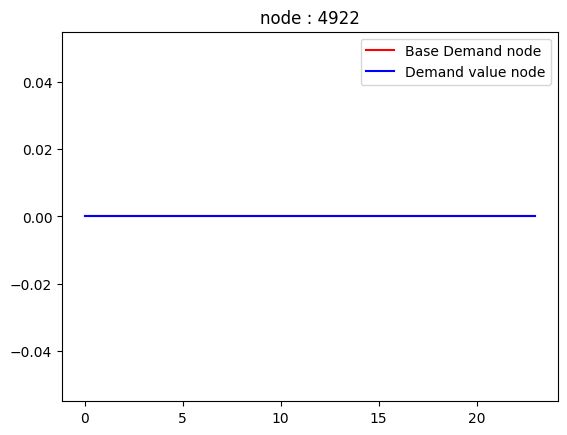

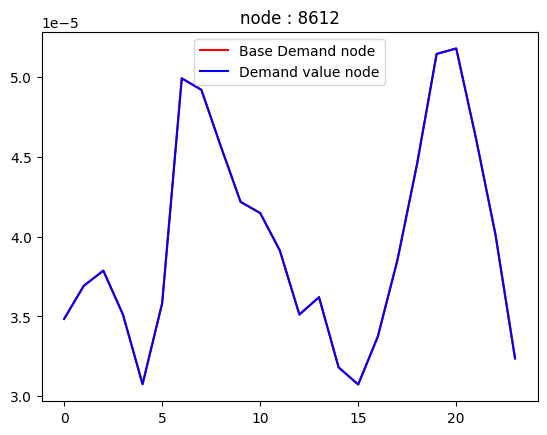

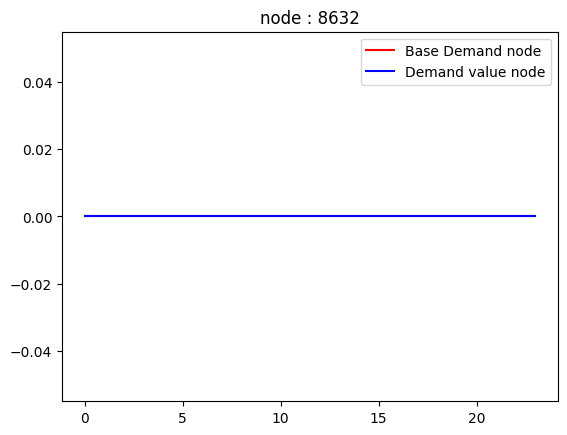

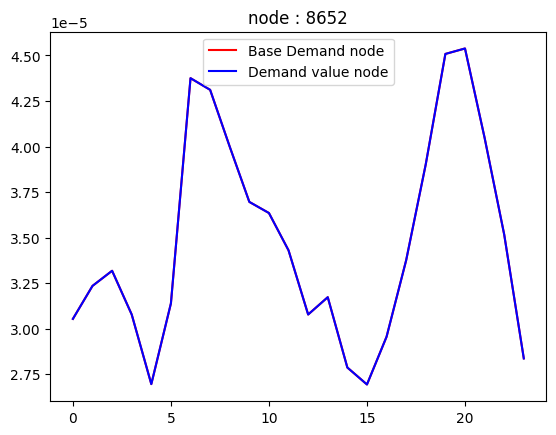

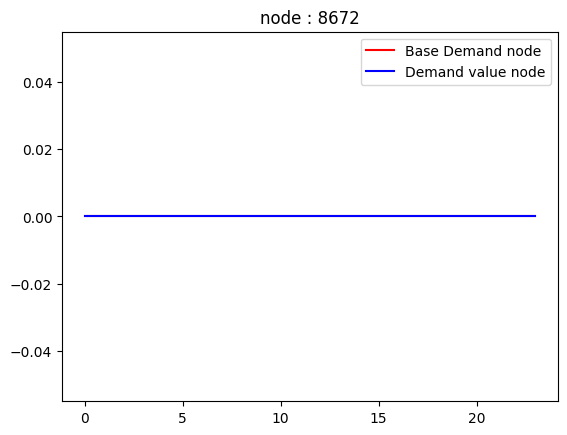

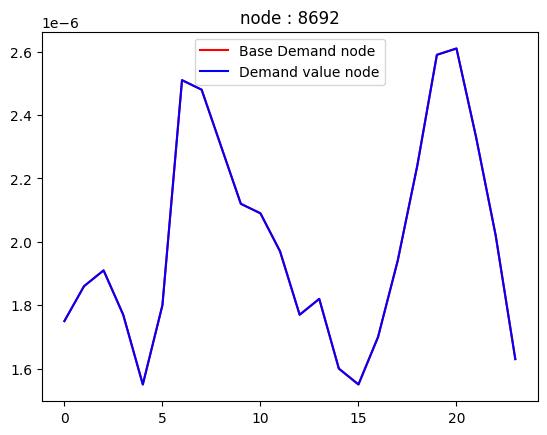

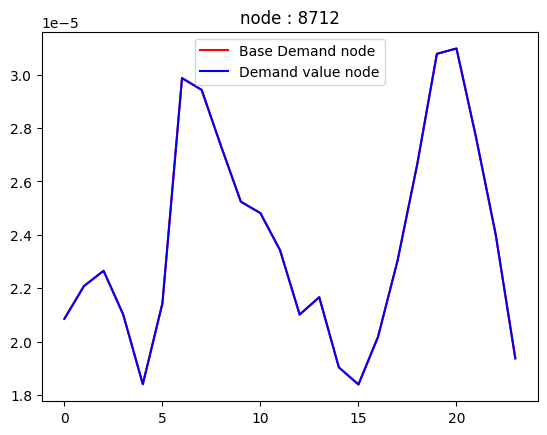

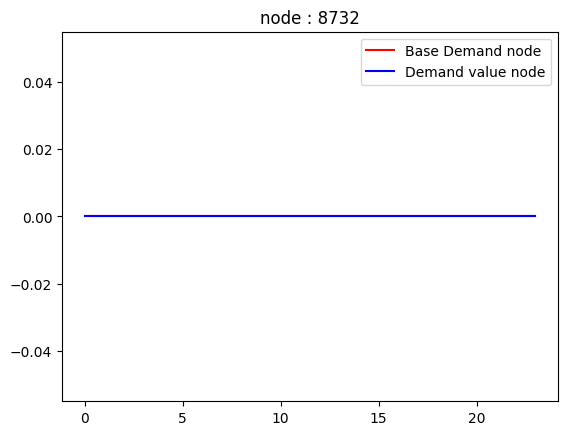

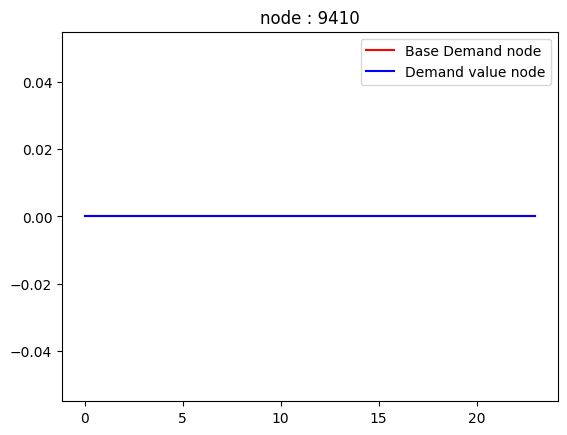

In [55]:
figureIndex = 0
# nodeListValue=[8608]
nodeListValue = wdn['nodeID'].unique()

for node in nodeListValue:

    if figureIndex%10==0:

      fig = plt.figure(figureIndex)
      # print("node : ", node)
      dataToPlot = wdn.loc[(wdn['nodeID'] == node)]
      # print(dataToPlot)
      baseDemandToPlot = dataToPlot['base_demand'].values #*  3.785412 * 60
      # leakDemandToPlot = dataToPlot['leak_demand_value'].values #*  3.785412 * 60
      demandToPlot = dataToPlot['demand_value'].values #*  3.785412 * 60

      xs = np.arange(len(demandToPlot))

      plt.plot(xs, baseDemandToPlot,  'r', label='Base Demand node')
      plt.plot(xs, demandToPlot,  'b', label='Demand value node')
      # plt.plot(xs, leakDemandToPlot, label='Leak Demand value node')
      plt.title("node : "+ str(node))
      plt.legend()

    figureIndex += 1

plt.show()

In [13]:


nodes_agg = wdn.loc[wdn['node_type']=='Junction'].groupby('nodeID')[['base_demand','demand_value']].agg(['mean'])



print(nodes_agg['base_demand']['mean'])
nodes_bd_mean = np.array(nodes_agg['base_demand']['mean'])
nodes_dv_mean = np.array(nodes_agg['demand_value']['mean'])
nodes_dd = nodes_bd_mean - nodes_dv_mean
print(nodes_dd)


nodeID
4922      0.002222
5656      0.002571
8596      0.002511
8598      0.002924
8600      0.002331
            ...   
8746      0.002870
8792      0.002675
9402      0.002060
9410      0.002598
880081    0.002633
Name: mean, Length: 82, dtype: float64
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.62898750e-04 5.02378333e-04 5.98080417e-04
 0.00000000e+00 0.00000000e+00 1.92762500e-05 2.75950417e-04
 8.88466250e-04 1.02248208e-03 1.14628333e-03 1.55351500e-03
 2.89150708e-03 2.34758333e-03 2.47023917e-03 2.56359875e-03
 2.11260958e-03 2.63951667e-03 1.75149292e-03 2.30291292e-03
 2.37783875e-03 2.35822958e-03 2.62942083e-03 2.86631417e-03
 2.57330292e-03 2.43119625e-03 2.49161792e-03 2.70991833e-03
 2.06317542e-03 2.28727708e-03 2.72134833e-03 2.77211583e-03
 2.34157292e-03 2.02189292e-03 2.28700500e-03 3.11454250e-03
 2.60146583e-03 2.30390167e-03 2.52478000e-03 2.13316500e-03
 2.48131125e-

[17  2  1  2  1  2  6 26 20  5]
[0.         0.00031145 0.00062291 0.00093436 0.00124582 0.00155727
 0.00186873 0.00218018 0.00249163 0.00280309 0.00311454]


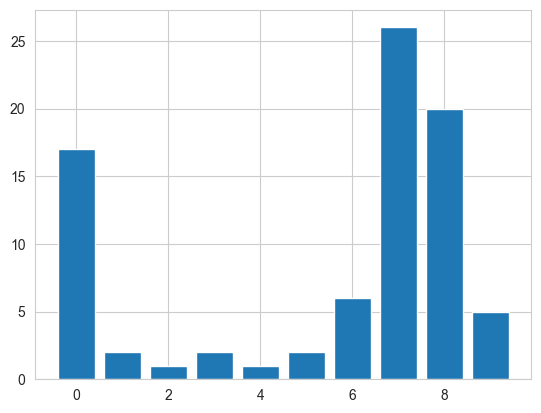

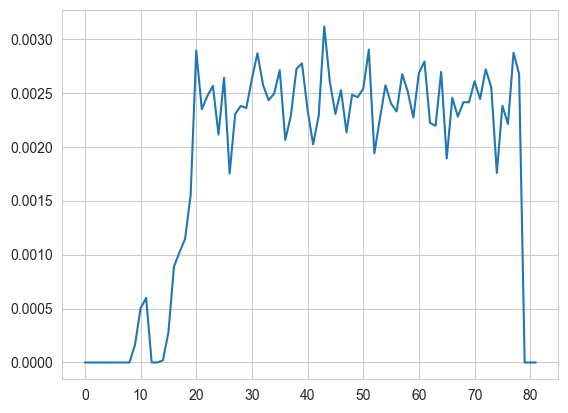

In [14]:
num_bins = 10
count, division = np.histogram(nodes_dd, bins=num_bins)
print(count)
print(division)
plt.figure(1)
plt.bar(range(num_bins), count)

plt.figure(2)
plt.plot(nodes_dd)



[19  4 19 40]
[0.         0.00077864 0.00155727 0.00233591 0.00311454]


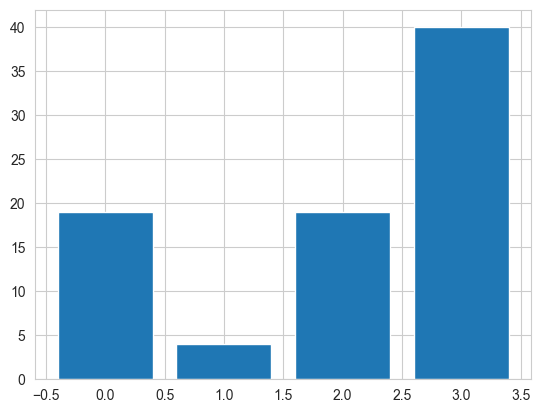

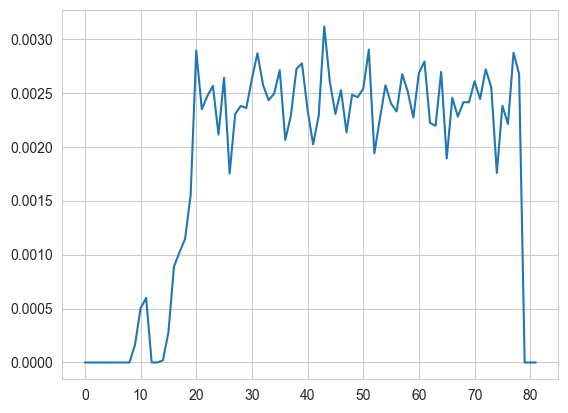

In [15]:
nodes_dd_cleaned_index = np.where(nodes_dd < 0.05)
nodes_dd_cleaned = nodes_dd[nodes_dd_cleaned_index]
nodes_pos_x_cleaned = nodes_pos_x[nodes_dd_cleaned_index]
nodes_pos_y_cleaned = nodes_pos_y[nodes_dd_cleaned_index]

num_bins = 4
count, division = np.histogram(nodes_dd_cleaned, bins=num_bins)
print(count)
print(division)
plt.figure(1)
plt.bar(range(num_bins), count)

plt.figure(2)
plt.plot(nodes_dd_cleaned)


In [18]:
print(division)

[0.         0.00077864 0.00155727 0.00233591 0.00311454]


(array([ 9, 10, 11, 14, 15], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([24, 26, 27, 36, 37, 41, 42, 45, 47, 52, 53, 56, 59, 62, 63, 65, 67,
       74, 76], dtype=int64),)
(array([20, 21, 22, 23, 25, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 44,
       46, 48, 49, 50, 51, 54, 55, 57, 58, 60, 61, 64, 66, 68, 69, 70, 71,
       72, 73, 75, 77, 78], dtype=int64),)
[(array([ 9, 10, 11, 14, 15], dtype=int64),), (array([16, 17, 18, 19], dtype=int64),), (array([24, 26, 27, 36, 37, 41, 42, 45, 47, 52, 53, 56, 59, 62, 63, 65, 67,
       74, 76], dtype=int64),), (array([20, 21, 22, 23, 25, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 44,
       46, 48, 49, 50, 51, 54, 55, 57, 58, 60, 61, 64, 66, 68, 69, 70, 71,
       72, 73, 75, 77, 78], dtype=int64),)]


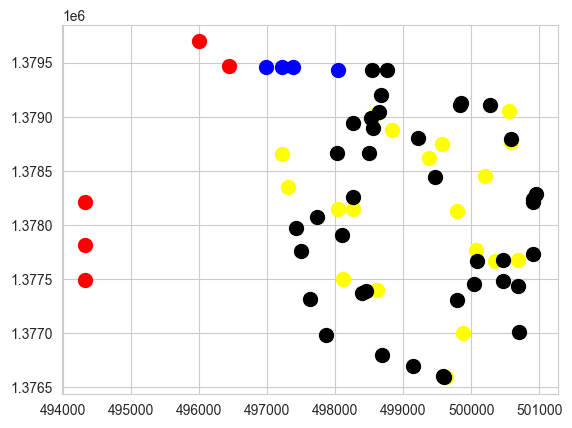

In [16]:
nodes_group_index = []

group = np.array([1,2,3,4])
cdict = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'black'}

for index in range(len(division)):
  if index > 0:
    nodes_group_index.append(np.where( (nodes_dd_cleaned > division[index-1]) & (nodes_dd_cleaned < division[index]) ))
    # nodes_group_index.append(np.where(nodes_dd_cleaned > division[index-1]))
    print(nodes_group_index[-1])
    plt.scatter(nodes_pos_x_cleaned[nodes_group_index[-1]], nodes_pos_y_cleaned[nodes_group_index[-1]], c = cdict[index-1], label = group[index-1], s = 100)
    # plt.scatter(nodes_pos_x_cleaned[nodes_group_index[-1]], nodes_pos_y_cleaned[nodes_group_index[-1]])


print(nodes_group_index)